<a href="https://colab.research.google.com/github/rpolea/CE888/blob/main/Lab_8/Lab_8_transfer_learning_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
!git clone https://github.com/sagihaider/CE888_2021.git

Cloning into 'CE888_2021'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 381 (delta 120), reused 30 (delta 17), pack-reused 190
Receiving objects: 100% (381/381), 20.57 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [ ]:
from zipfile import ZipFile
file_name = "/content/CE888_2021/Lab_8/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')



# Get all the paths
data_dir_list = os.listdir('/content/data')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data"))
file_count = len(files)
print(file_count)

done
0


In [ ]:
# Make new base directory
original_dataset_dir = 'data/cats'
original_dataset_dir1 = 'data/dogs'
original_dataset_dir2 = 'data/Humans'
original_dataset_dir3 = 'data/horses'
base_dir = '/content/animals1'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['cat.{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['cat.{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['dog.{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['dog.{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['dog.{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['horse-{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['horse-{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['horse-{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['rider-{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['rider-{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['rider-{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

In [ ]:
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label1 = img.split('-')[0]
    if word_label == 'dog': return [0,0,0,1]
    elif word_label == 'cat': return [0,0,1,0]
    elif word_label1 == 'horse': return [0,1,0,0]
    elif word_label1 == 'rider': return [1,0,0,0]

In [ ]:
import cv2
def createDataSplitSet(datapath):
    X=[]
    y=[]
    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(480, 224, 224, 3)
(168, 224, 224, 3)
(160, 224, 224, 3)


In [ ]:
## DenseNet
from keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000)
model.summary()

33193984/33188688 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [ ]:
last_layer = model.get_layer('conv5_block16_concat').output
from keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=20, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/20
24/24 [==============================] - 24s 147ms/step - loss: 0.6007 - acc: 0.4554 - val_loss: 0.4406 - val_acc: 0.8571
Epoch 2/20
24/24 [==============================] - 1s 55ms/step - loss: 0.4025 - acc: 0.9209 - val_loss: 0.2634 - val_acc: 0.9821
Epoch 3/20
24/24 [==============================] - 1s 55ms/step - loss: 0.2432 - acc: 0.9327 - val_loss: 0.1457 - val_acc: 0.9762
Epoch 4/20
24/24 [==============================] - 1s 56ms/step - loss: 0.1495 - acc: 0.9690 - val_loss: 0.0833 - val_acc: 1.0000
Epoch 5/20
24/24 [==============================] - 1s 56ms/step - loss: 0.0774 - acc: 0.9877 - val_loss: 0.0585 - val_acc: 0.9821
Epoch 6/20
24/24 [==============================] - 1s 55ms/step - loss: 0.0539 - acc: 0.9895 - val_loss: 0.0422 - val_acc: 1.0000
Epoch 7/20
24/24 [==============================] - 1s 56ms/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0305 - val_acc: 1.0000
Epoch 8/20
24/24 [==============================] - 1s 56ms/step - loss: 0.0396 -

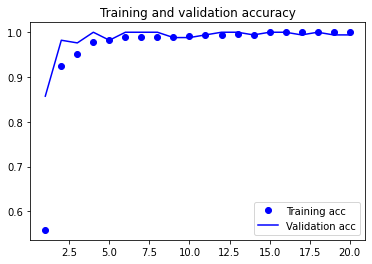

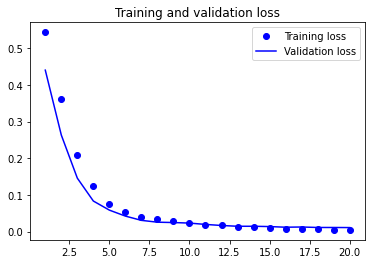

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_labels = ['cat','dog','horse','human']
## Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions, axis = 1)
test_y1 = np.argmax(test_y, axis = 1)

print(classification_report(test_y1, ypred, target_names= class_labels))

              precision    recall  f1-score   support

         cat       0.97      0.97      0.97        40
         dog       0.98      1.00      0.99        40
       horse       1.00      0.93      0.96        40
       human       0.95      1.00      0.98        40

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.97       160
weighted avg       0.98      0.97      0.97       160

